# Visualizing Convolutional Networks for MRI-based Diagnosis of Alzheimer’s Disease

# Imports 
Releveant Libraries

In [13]:
import numpy as np
import pandas as pd
import torch

Relevant Local Files

In [14]:
import utils, datasets, models

# Load data
Reading CSV and Creating Dataframe

In [15]:
# File paths to the training and validation CSV tables
table_train = r'C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Train.csv'  # Path to the training dataset CSV file
image_dir = r'D:\ADNI data'  # Directory where the image data is stored
table_val = r'C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Val.csv'  # Path to the validation dataset CSV file

# Load the training dataset using the load_data_table function from the datasets module

# df_train will store the processed data, associating the table data with the image directory
df_train = datasets.load_data_table(table_train, image_dir)

# Load the validation dataset similarly
df_val = datasets.load_data_table(table_val, image_dir)

Loading dataframe for C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Train.csv
Found 224 images in table
Filtered out 0 of 224 images because of failed preprocessing
Filtered out 0 of 224 images because of missing files
Final dataframe contains 224 images from 224 patients

Loading dataframe for C:\AD_detection_v2\ADNI1_Screening_1.5T_8_25_2024_Val.csv
Found 90 images in table
Filtered out 0 of 90 images because of failed preprocessing
Filtered out 0 of 90 images because of missing files
Final dataframe contains 90 images from 90 patients



Let's look at the table. Each row is a single MRI image. Some important columns in the table:

- Image Data ID: Image  Data ID
- Subject: Patient ID
- Group: Diagnosis (CN=control, MCI=mild cognitive impairment, AD=Alzheimer's disease)
- Other Demographic Details of Patient like Sex, Age
- filepath: The path to the MRI image 

In [16]:

df_train.head()

,Image Data ID,Subject,Group,Sex,Age,Visit,Modality,Description,Type,Acq Date,Format,Downloaded,filepath
0,I47204,027_S_1082,AD,F,70,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,11/27/2006,NiFTI,1/2/2024 0:00,D:\ADNI data/CN and AD/AD/027_S_1082/MPR-R__Gr...
1,I47228,027_S_1254,AD,M,84,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,1/31/2007,NiFTI,1/2/2024 0:00,D:\ADNI data/CN and AD/AD/027_S_1254/MPR__Grad...
2,I47574,027_S_1385,AD,F,70,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,2/28/2007,NiFTI,1/2/2024 0:00,D:\ADNI data/CN and AD/AD/027_S_1385/MPR__Grad...
3,I47744,141_S_0852,AD,F,84,sc,MRI,MPR-R; GradWarp; B1 Correction; N3; Scaled,Processed,9/25/2006,NiFTI,1/2/2024 0:00,D:\ADNI data/CN and AD/AD/141_S_0852/MPR-R__Gr...
4,I47748,141_S_1024,AD,M,69,sc,MRI,MPR; GradWarp; B1 Correction; N3; Scaled,Processed,11/19/2006,NiFTI,1/2/2024 0:00,D:\ADNI data/CN and AD/AD/141_S_1024/MPR__Grad...


In [17]:
# Convert training and validation DataFrames to NumPy arrays
patients_train = df_train.to_numpy()
patients_val = df_val.to_numpy()

# Concatenate training and validation DataFrames
df = pd.concat([df_train, df_val])

Building Dataset

In [18]:
train_dataset, val_dataset = datasets.build_datasets(df, patients_train, patients_val)

+-------+----------+---------+---------+------------+---------+---------+
|       |   Images |   -> AD |   -> CN |   Patients |   -> AD |   -> CN |
+=======+==========+=========+=========+============+=========+=========+
| All   |      314 |     152 |     162 |        314 |     152 |     162 |
+-------+----------+---------+---------+------------+---------+---------+
| Train |      224 |     112 |     112 |        224 |     112 |     112 |
+-------+----------+---------+---------+------------+---------+---------+
| Val   |       90 |      40 |      50 |         90 |      40 |      50 |
+-------+----------+---------+---------+------------+---------+---------+

Dataset is already normalized


Plotting Raw Images

0.0 1.0954722 None None


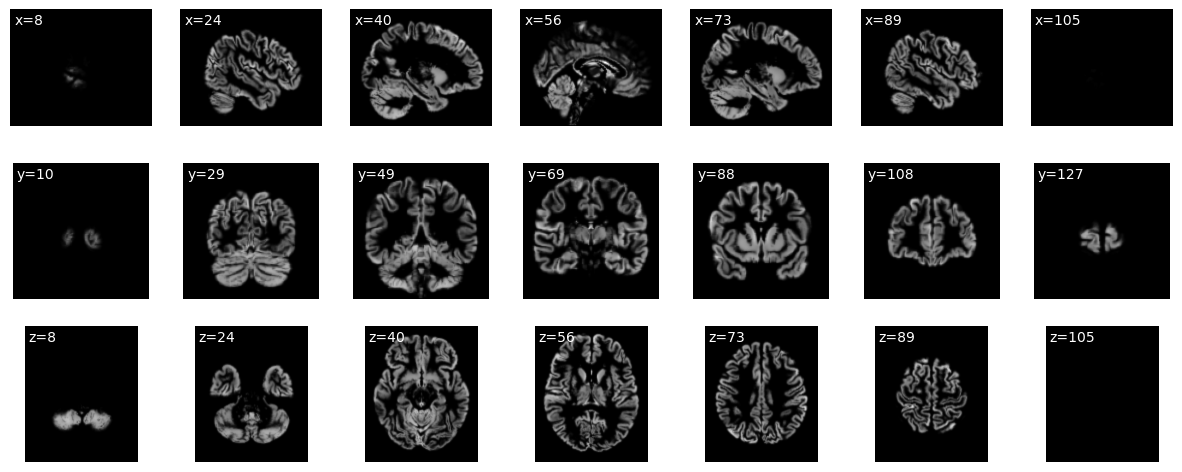

In [19]:
# Plot the first MRI scan from the training dataset
i = 0  # Index of the MRI scan to plot
utils.plot_slices(train_dataset.get_raw_image(i))


0.0 1.1862435 None None


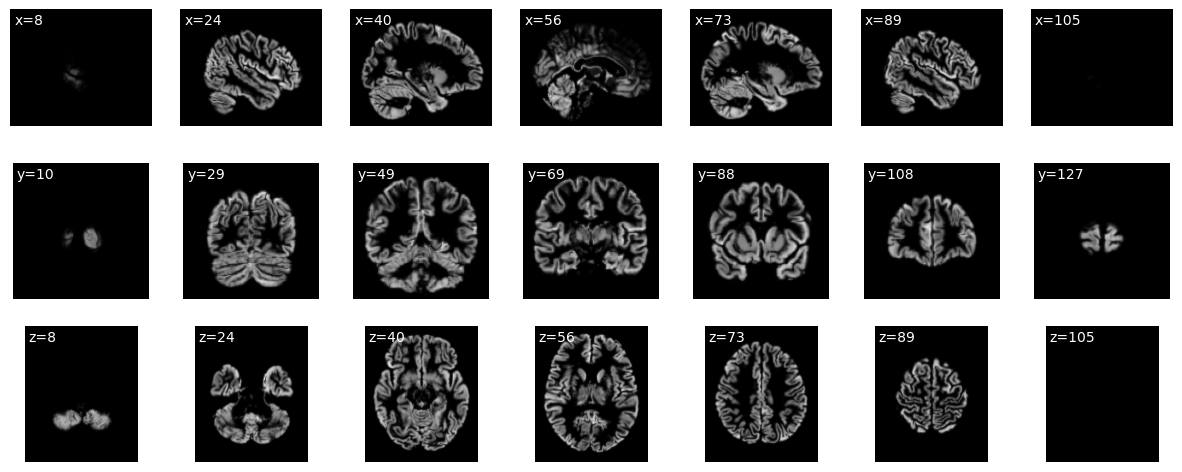

In [20]:
# Plot one MRI scan from the validation dataset
i = 0
utils.plot_slices(val_dataset.get_raw_image(i))

Building Loaders

In [21]:
# Build data loaders for the training and validation datasets
train_loader, val_loader = datasets.build_loaders(train_dataset, val_dataset)

# Create model and train

In [22]:
# This creates the model from the paper in pytorch, and wraps it in a `trainer` via torchsample.
net, trainer, cuda_device = models.build_model()

# Parameters - 
# - Learning rate: 0.0001
# - L2 regularization (weight decay): 1e-4
# - Dropout rates: 0.5 for both dropout layers
# - Architecture: 4 convolutional layers

GPU not available


In [11]:
# Train the model using the specified trainer, data loaders, and device
# Training will run for 30 epochs
models.train_model(trainer, train_loader, val_loader, cuda_device, num_epoch=100)

Epoch 1/100:   2%|▏         | 1/45 [00:01<01:10,  1.60s/ batches]c:\AD_Detection_v2\models.py:210: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return super(CategoricalAccuracyWithLogits, self).__call__(F.softmax(y_pred), y_true)
Epoch 1/100: 100%|██████████| 45/45 [01:07<00:00,  1.01s/ batches, acc_metric=52.2878, loss=0.8457]

# PLOTs and ROC Calculation

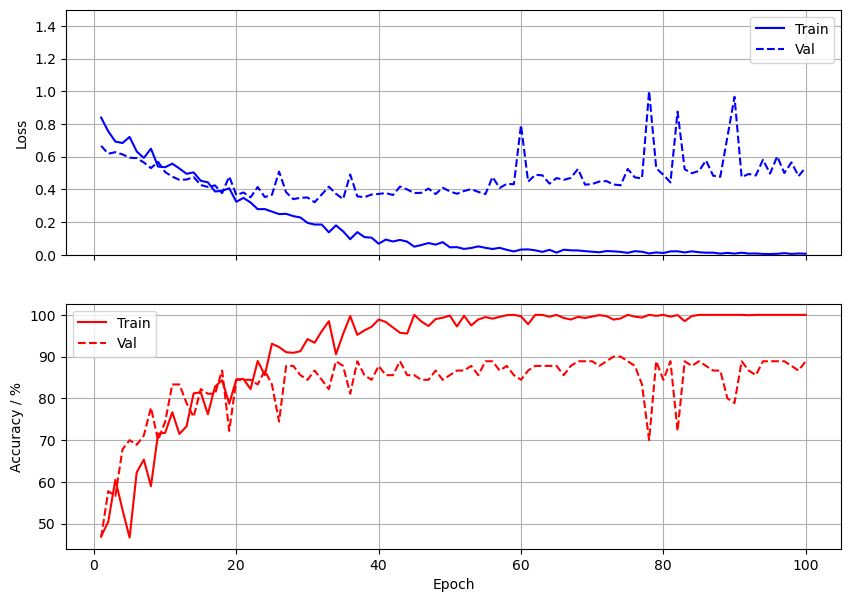

In [12]:
# Plot the learning curve based on the trainer's history
utils.plot_learning_curve(trainer.history)

In [ ]:
# Calculate the ROC AUC score using the trained model on the validation set
models.calculate_roc_auc(trainer, val_loader, cuda_device)

c:\Users\abc\anaconda3\Lib\site-packages\torchsample\modules\module_trainer.py:783: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  input_batch = Variable(inputs[batch_idx*batch_size:(batch_idx+1)*batch_size], volatile=volatile)


# Save Model

In [20]:
# Save the entire model to a specified file
torch.save(net, 'output/models/softmax-output.pt')

# Save only the model's state dictionary (weights and biases) to a file
torch.save(net.state_dict(), 'output/models/softmax-output_state-dict.pt')